1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

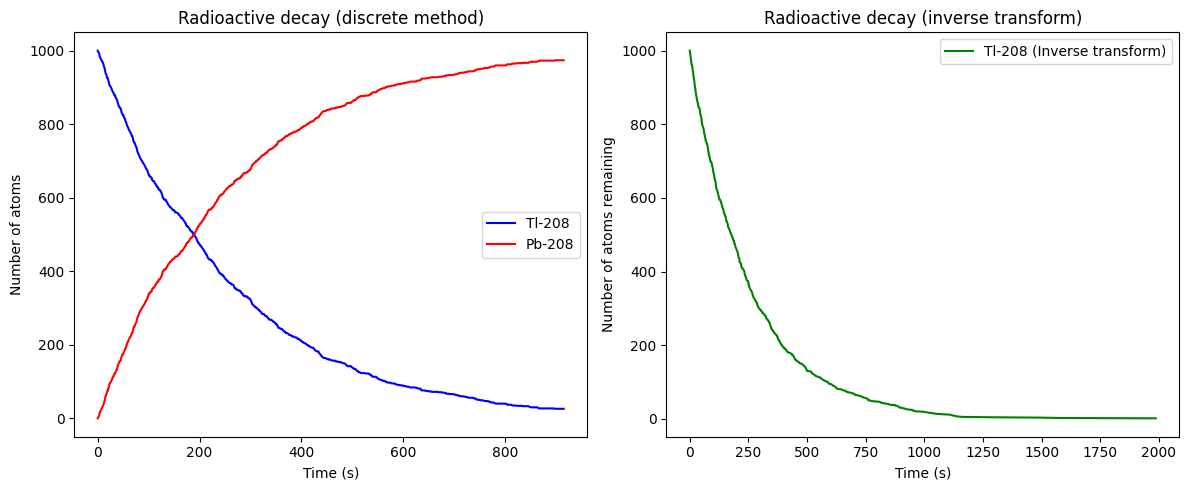

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N0 = 1000  #Tl-208
half_life = 3.052 * 60  #in seconds
tau = half_life / np.log(2)  # Constante de decaimiento

#Probability
time_steps = np.arange(0, 5 * half_life, 1)  # Simulación hasta 5 vidas medias
N_Tl = [N0]
N_Pb = [0]

for t in time_steps[1:]:
    decay_prob = 1 - np.exp(-1 / tau)  # Probability of decay in 1 sec
    decayed_atoms = np.random.binomial(N_Tl[-1], decay_prob) #Numbers of decay atoms
    N_Tl.append(N_Tl[-1] - decayed_atoms) #Restamos los átomos que decayeron.
    N_Pb.append(N_Pb[-1] + decayed_atoms) #Los átomos que decaen se suman a Pb-208.

#Inverse transform method
decay_times = -tau * np.log(np.random.rand(N0))  # Tiempos de decaimiento
sorted_decay_times = np.sort(decay_times)  # Ordenar tiempos de decaimiento
remaining_atoms = N0 - np.arange(N0)  # Átomos restantes en función del tiempo


plt.figure(figsize=(12, 5))

# Evolución de átomos de Tl y Pb con el método discreto
plt.subplot(1, 2, 1)
plt.plot(time_steps, N_Tl, label="Tl-208", color="blue")
plt.plot(time_steps, N_Pb, label="Pb-208", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")
plt.title("Radioactive decay (discrete method)")
plt.legend()

# Evolución de átomos de Tl con la transformada inversa
plt.subplot(1, 2, 2)
plt.plot(sorted_decay_times, remaining_atoms, label="Tl-208 (Inverse transform)", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms remaining")
plt.title("Radioactive decay (inverse transform)")
plt.legend()

plt.tight_layout()
plt.show()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
import numpy as np

Z = 79  #atomic number
e = 1.602e-19  #Coulumbs unit charge
epsilon_0 = 8.854e-12  #Permitivity of free space C²/(N·m²)
E_MeV = 7.7  #alpha particle enrgy in MeV
E = E_MeV * 1.602e-13  #from MeV to Joules
a0 = 5.291e-11  #Bohr radius in meters

#impact parameter
b_critical = (Z*e**2)/(2*np.pi*epsilon_0*E)

# Generación de 1M de valores de b con distribución gaussiana
sigma = a0 / 100  #standard deviation
b_values = np.random.normal(0, sigma, int(1e6))  # Distribución gaussiana en 2D con 1M 

# Tomamos el valor absoluto de b (ya que representa una distancia)
b_values = np.abs(b_values)

# Contamos cuántas partículas tienen b < b_critical (rebotan hacia atrás)
num_bounce_back = np.sum(b_values < b_critical)

# Fracción de partículas que rebotan
fraction_bounce_back = num_bounce_back/len(b_values)

fraction_bounce_back


0.044449

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [7]:
import numpy as np
import scipy.integrate as integrate

def f(x):
    return np.sin(x)**2/(x*(2-x))

exact_i, _= integrate.quad(f, 0.01, 1.99) #intervals 
N = int(1e6)

#Hit-or-Miss
x_rand = np.random.uniform(0.01, 1.99, N)  #Rndom x
y_rand = np.random.uniform(0, 1, N)  #Random y (cota superior aproximada de f(x))
hits = np.sum(y_rand < f(x_rand))  # Contar cuántos puntos caen debajo de la curva
area_rec = (1.99-0.01) * 1  # Área del rectángulo de muestreo (altura estimada en 1)
integral_hit_miss = (hits / N) * area_rec  # Estimación de la integral

#Mean value method
f_vals=f(np.random.uniform(0.01, 1.99, N))  # Evaluamos f(x) en puntos aleatorios
integral_mean_value = (1.99-0.01) * np.mean(f_vals)  # Integral estimada

#Error
error_hit_miss = np.abs(integral_hit_miss - exact_i) / exact_i * 100
error_mean_value = np.abs(integral_mean_value - exact_i) / exact_i * 100
#Result
print(exact_i,'\n') 
print(integral_hit_miss,'\n') 
print(error_hit_miss,'\n') 
print(integral_mean_value,'\n')
print(error_mean_value)


2.6993869957392014 

1.26824544 

53.01727977493263 

2.6981102054375263 

0.047299268452073474


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [8]:
import numpy as np

N = int(1e6)  # 1 millón de puntos Monte carlo

#2D
# Generamos N puntos aleatorios en el cuadrado [-1,1] x [-1,1]
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
# Contamos cuántos puntos caen dentro del círculo de radio 1
inside_circle = np.sum(x**2 + y**2 <= 1)
# Estimación del área del círculo (área del cuadrado es 4)
area_circle =(inside_circle / N)*4

#10D
dim = 10  
points = np.random.uniform(-1, 1, (N, dim))  # Generamos puntos en el hipercubo [-1,1]^10

# Contamos cuántos puntos caen dentro de la esfera de radio 1
inside_sphere = np.sum(np.sum(points**2, axis=1) <= 1)

# Estimación del volumen de la esfera (hipercubo tiene volumen 2^10)
volume_sphere = (inside_sphere / N) * (2**dim)

# Mostrar resultados
area_circle, volume_sphere


(3.145448, 2.546688)

5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [10]:
import numpy as np

# Definir la función a integrar
def f(x):
    return x**(-1/2) / (np.exp(x) + 1)

# Definir la función de peso w(x) = 1/sqrt(x)
def w(x):
    return 1 / np.sqrt(x)

# Número de muestras de Monte Carlo
N = int(1e6)

# Integral de w(x) en [0,1], necesaria para la corrección
integral_w = 2  # ∫ 1/sqrt(x) dx en [0,1] = 2

# Generar muestras usando la transformación inversa de la CDF de w(x)
x_samples = np.random.rand(N)**2  # x = u^2, con u ~ U(0,1)

# Evaluar la integral usando importancia
integral_estimate = np.mean(f(x_samples) / w(x_samples)) * integral_w

# Mostrar el resultado final
print(f"Integral estimate: {integral_estimate:.6f}")


Integral estimate: 0.839005
